# Breat Cancer Diagnosis Machine Learning Model
by Joelle El Homsi

## Problem
Breast cancer is a serious and potentially life-threatening disease that affects both men and women. It is the most common cancer among women worldwide and the second most common cancer overall. Early detection and accurate diagnosis are crucial for successful treatment and patient outcomes. 

In this project, I aim to develop a machine learning model that can accurately diagnose breast cancer based on several features of the tumor, such as its size, shape, and texture. Specifically, I will use neural networks to predict whether a breast tumor is malignant or benign.


# Data Preparation


The dataset used in this project was obtained from the UCI Machine Learning Repository, which is a public repository of datasets for machine learning research.

Before using the dataset, I first cleaned and preprocessed it to ensure its quality and suitability for analysis. This involved removing any missing or duplicate data, as well as converting the categorical variable for diagnosis into a binary variable, where 0 represents benign tumors and 1 represents malignant tumors.



In [ ]:
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive')


# Load the data into a pandas dataframe
path = '/content/drive/MyDrive/Zaka.AI/data.csv'
data = pd.read_csv(path)

data.info()



Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  

In [ ]:
data = data.drop('Unnamed: 32', axis=1)  # Drop last column because it's NaN
data = data.drop('id', axis=1)  #Drop the ID column as it's not relevant for modeling

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Model selection, training, and evaluation

In [ ]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


I also performed feature scaling on the input features using the StandardScaler from the scikit-learn library. This rescales the features so that they have zero mean and unit variance, which can help improve the performance of machine learning models.

This is a representation of the Model used:
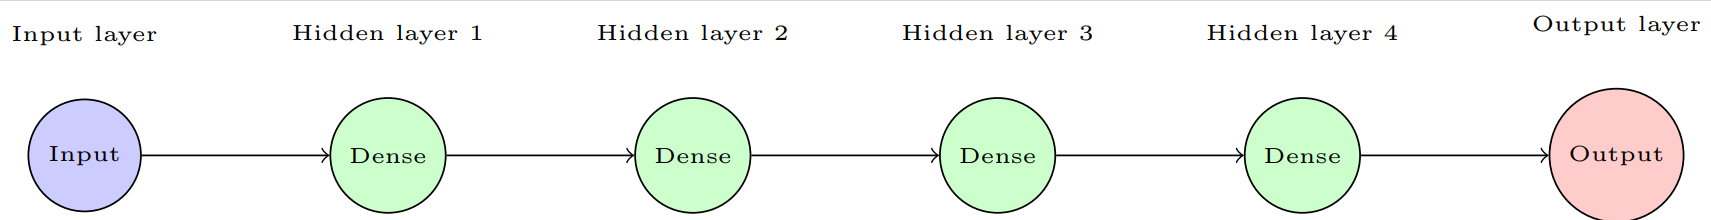

I split the data into training  and testing sets , defined the number of splits for cross-validation (5) and the cross validation method StratifiedKFold, then looped through the folds.

In [ ]:
# Encode the diagnosis column as 0 for benign and 1 for malignant
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

# Split the data into features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Keras model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=X.shape[1], activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Define the number of splits for cross-validation
num_splits = 5

# Define the cross-validation method
kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
histories = []
scores = []
for train, test in kfold.split(X, y):
    #Create
    model = create_model()
    #Train
    history = model.fit(X[train], y[train], epochs=50, batch_size=32, verbose=0, validation_data=(X[test], y[test]))
    histories.append(history)
    #Evaluate
    _, acc = model.evaluate(X[test], y[test], verbose=0)
    scores.append(acc)
    


In [ ]:
# Calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Mean score: {:.2f}".format(mean_score))
print("Standard deviation: {:.2f}".format(std_score))

Cross-validation scores: [0.9824561476707458, 0.9649122953414917, 0.9561403393745422, 0.9824561476707458, 0.991150438785553]
Mean score: 0.98
Standard deviation: 0.01


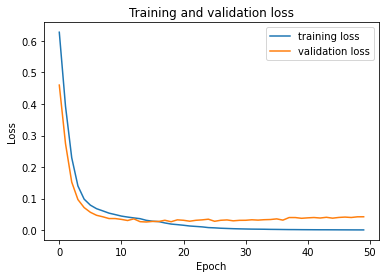

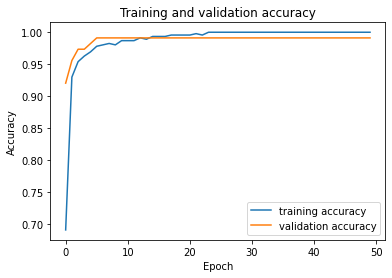

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


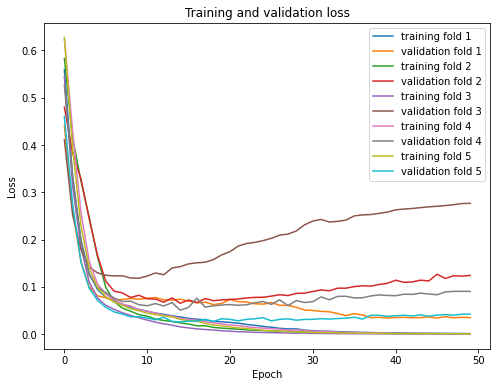

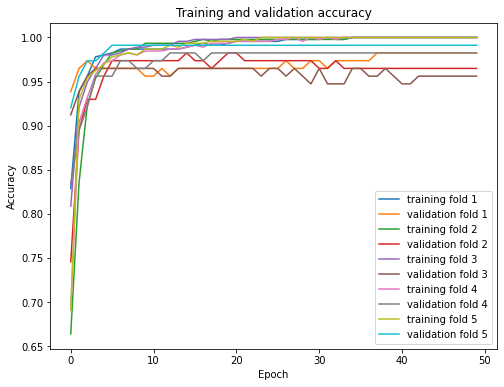

In [ ]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(8, 6))
for i in range(num_splits):
    plt.plot(histories[i].history['loss'], label='training fold {}'.format(i+1))
    plt.plot(histories[i].history['val_loss'], label='validation fold {}'.format(i+1))
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
for i in range(num_splits):
    plt.plot(histories[i].history['accuracy'], label='training fold {}'.format(i+1))
    plt.plot(histories[i].history['val_accuracy'], label='validation fold {}'.format(i+1))
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

That is a good output. It shows that the model is consistent in its performance across different folds of the data, with a mean accuracy score of 0.98 and a small standard deviation of 0.01. This indicates that the model is likely to generalize well to new, unseen data.

To select the best model, we need to evaluate the model on a validation set and choose the model with the best performance. Since we used cross-validation to evaluate our model, we can use the mean score as an estimate of the model's performance.

We can now apply the selected model to the testing set and obtain the final performance metrics:

# Testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Keras model
model = create_model()

# Train the model on the training data
history2 = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the testing data
_, acc = model.evaluate(X_test, y_test, verbose=0)

# Print the testing accuracy
print("Testing accuracy: {:.2f}".format(acc))


Testing accuracy: 0.97


The model was able to correctly predict the target variable 97% of the time on the testing data set.

4/4 [==============================] - 0s 2ms/step


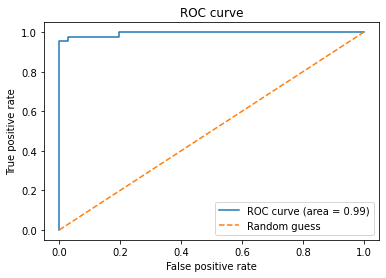

In [ ]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_prob = model.predict(X_test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


The area under the ROC curve is 0.99, it means that the model has great predictive power and is able to almost perfectly distinguish between the positive and negative cases.